# $\color{red}{\text{DATA ANALYSIS OF GLOBAL TERRORISM}}$

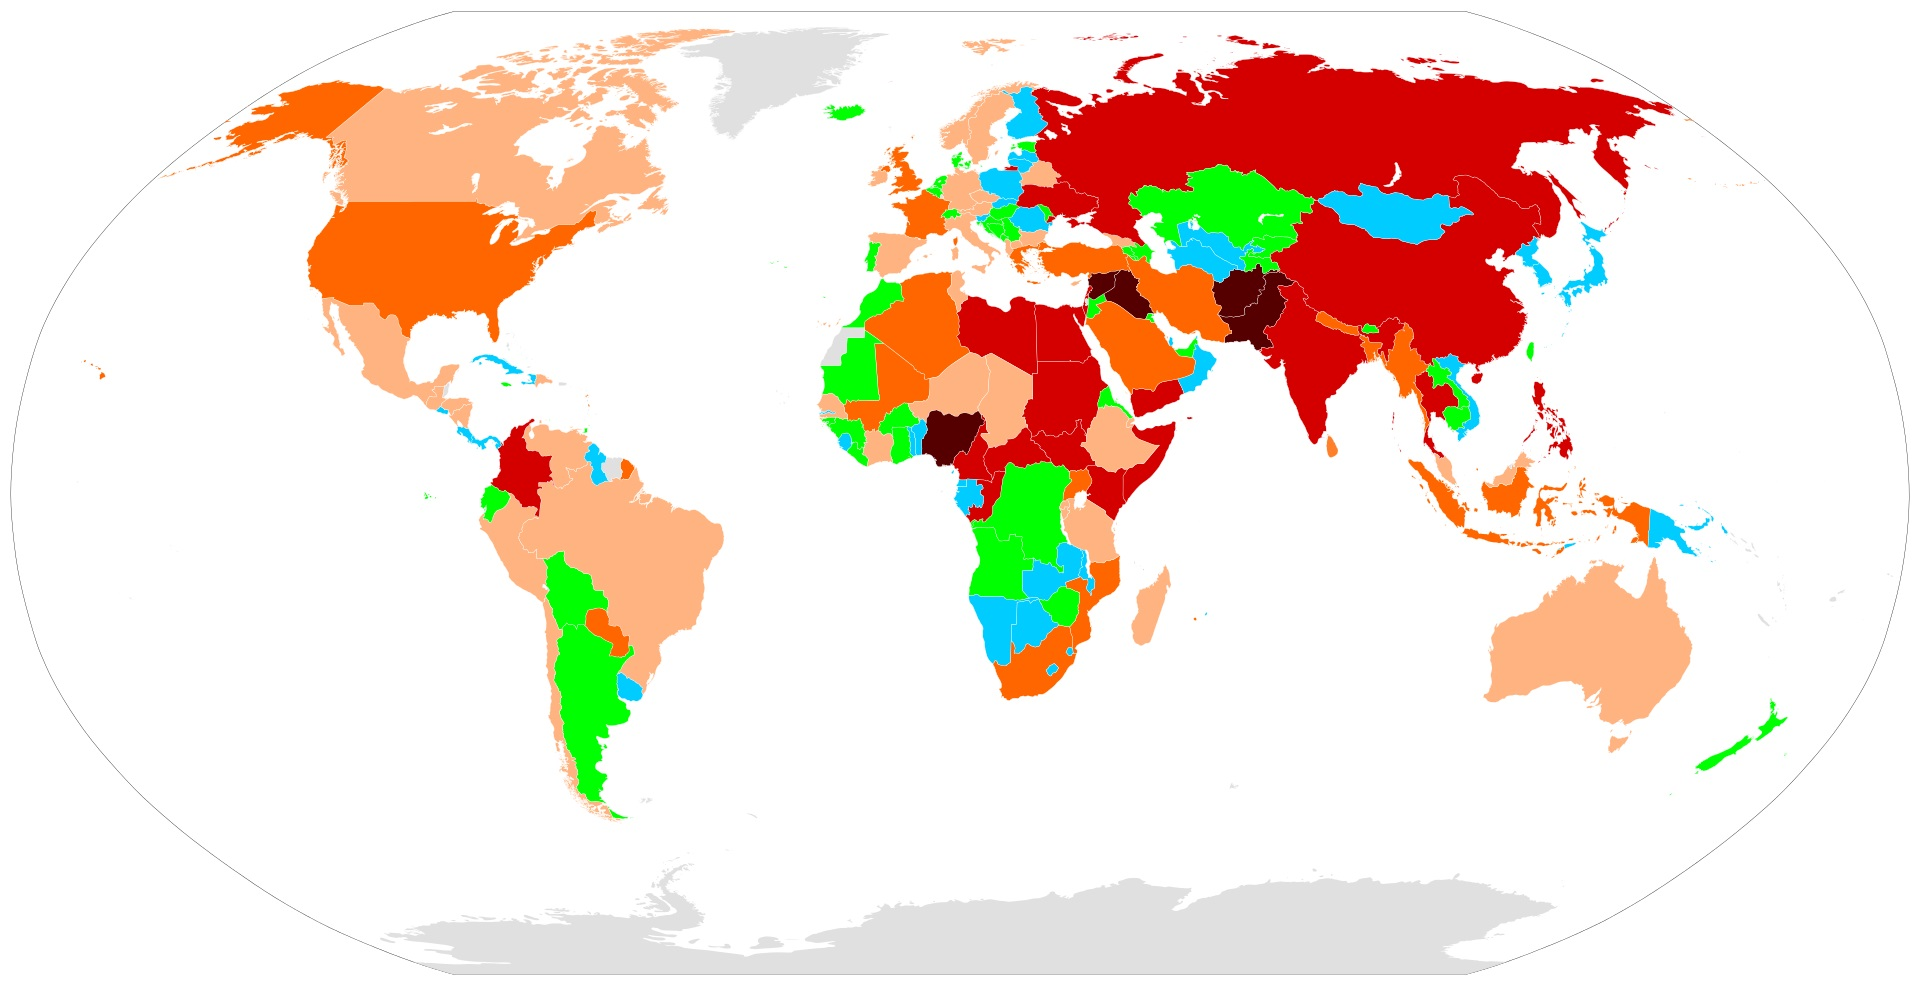

## Terrorism is of indispensable importance in today’s date as terrorism causes significant  threat to international security, global political and social stability, and economic development of a country. And till date we have not been successful in completely abolishing terrorism from the world. Still the terrorist groups exist, still we hear of deadly incidents and still no complete way of making the world a ‘Peaceful Place to live in’ has been found.  
### A detailed analysis on such attacks, on terrorist groups prevalent across several ‘favourite’ target countries, and other important attributes of each attack is done here.  The analysis helps to understand the nature and severity of the attacks, behavioural aspects of several terrorist groups and their favourite target spots, and a complete Data Analysis on the relation between each data attribute given below.

## 1. Getting Data Ready

In [ ]:
# Import All the necessary module used in the analysis of the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
import copy
from seaborn import set

In [ ]:
# Load the DataSet containing the data for global analysis of terrorism
# into a panda DataFrame data

In [ ]:
try:
    data = pd.read_csv('E:\DataSet.csv')
    print('File successfully loaded into the DataFrame..')
except:
    print("File not found...")

## 2.Displaying the different features of the DataSet

In [ ]:
# Show all the columns present in the dataSet
data.columns

In [ ]:
# Displaying the first 10 data of the DataSet
data.head(10)

In [ ]:
# Displaying the last 10
data.tail(10)

In [ ]:
# Shape of the DataFrame
data.shape

In [ ]:
# Datatype of each coulmn
data.dtypes

In [ ]:
# Renaming the column for better understanding of the DataSet
data.rename({'iyear':'year','imonth':'month','iday':'day','country_txt':'country',\
               'attacktype1_txt':'attack','targtype1_txt':'target', 'corp1':'target_inst',\
               'target1':'target_pop', 'natlty1_txt':'nationality','gname':'group',\
               'weaptype1_txt':'weapon_type', 'weapsubtype1_txt':'weapon_subtype',\
               'nkill':'kill','nwound':'wound','propextent_txt':'property_damg', \
               'ransomamt':'ransom'}, axis='columns',inplace=True)

In [ ]:
# Displaying the column after the rename operation
data.columns

In [ ]:
# General information about the data set
data.info()

In [ ]:
# Describing the statistical information only for numerical columns
data.describe()

* MAXIMUM PEOPLE EVER KILLED IN AN EVENT IS 1500!
* MAXIMUM PEOPLE EVER WOUNDED IN AN EVENT IS 1500!
* 50% OF ATTACKS EITHER KILLED 1 PERSON OR NO-ONE
* 50% OF ATTACKS WOUNDED NO-ONE!
* MAXIMUM RANSOM AMOUNT EVER ASKED WAS 20 CRORES!
* AVERAGE CASUALTIES PER ATTACK IS 6
* MAXIMUM CASUALTIES EVRE IS 1503. 

## 3. Data Cleaning and Mangling

In [ ]:
# Sum of null value in each column
data.isnull().sum()

### $\color{red}{\text{Heat Map}}$ before filing up null values with suitable data

In [ ]:
plt.figure(figsize=(10,3))
plt.rcParams['axes.labelsize']=15
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
plt.title('HEATMAP BEFORE FILLING UP NULL VALUES IN DATA')
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

* MOST OF THE RANSOM AMOUNTS,PROPERTY-DAMAGE EXTENTS,WEAPON DETAILS NOT PROVIDED WITH VALUES
* MOST TERRORITS WERE INTERESTED IN MASS KILLING THAN PROCURING MONEY TO RELEASE HOSTAGE!
* NOT MUCH PROPERTY DAMAGE OBSERVED

### 3.1 Dealing with the null values of nationality

In [ ]:
# Dealing with the null values of nationality
data[['country','nationality']].head(10)

It seems the values in the country of the terrorist attack and the nationality of terrorist is same as seen from the above data.
Therefore, We can deal with the null value of the nationality column by replacing the values with country column.

In [ ]:
# impute_nationality function will be applied tO replace the null values in nationality column
def impute_nationality(cols):
    Country = cols[0]
    Nationality = cols[1]
    if pd.isnull(Nationality):
        return Country
    else:
        return Nationality

In [ ]:
# Perform the replacement 
data['nationality'] = data[['country','nationality']].apply(impute_nationality, axis = 1)
data[['nationality','country']].head(10)

### $\color{red}{\text{Heat Map}}$ after filing up null values for nationality

In [ ]:
plt.figure(figsize=(10,3))
plt.rcParams['axes.labelsize']=15
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
plt.title('HEATMAP After FILLING UP NULL VALUES FOR NATIONALITY COLUMN')
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [ ]:
print('The null values in nationality coulmn is ',data['nationality'].isnull().sum())


### 3.2 Dealing with duplicates in the data set

In [ ]:
print('The no. of duplicates in the data are',data.duplicated().sum())

In [ ]:
# Displaying the first 5 duplicates
data[data.duplicated()].head()

In [ ]:
# Dropping the duplicated items
data.drop_duplicates(inplace=True)

# Showing the first five
data.head()

### 3.3 Dealing with null values and unknown in weapon_type column

In [ ]:
print(data['attack'].unique())
print('\nThere are',len(data['attack'].unique()),'unique values in attack column')

In [ ]:
# Making a list of unique weapon type
# and forming columns for the unique values of weapon_type
wp_tp = pd.get_dummies(data['weapon_type'],drop_first=True)
list_wp_type = list(wp_tp.columns)
print('The values of column head are',list_wp_type)

In [ ]:
# Making a new copy of the Data
data2 = copy.deepcopy(data)
data2 = pd.concat([data2,wp_tp],axis=1)

In [ ]:
data2.groupby('attack').sum().reset_index().plot.barh(x='attack',y=list_wp_type,figsize=(16,8),stacked=True)
plt.legend(loc=5)
data2.groupby('attack').sum()[list_wp_type]

In [ ]:
data['attack'].value_counts(ascending=True).to_frame().reset_index().rename({'index':'attack','attack':'counts'})

From the above graph We can say, A good replacement for unknown data in weapon_type would be:
* Unarmed Assault- Melee
* Hostage Taking(Kidnapping)- Firearms
* Hostage Taking(Barricade Incident)- Firearms
* Assassination - Firearms
* Armed Assault - Firearms
* Hijacking- Firearms
* Facility/Infrastructure Attack- Incendiary
* Bombing/Explosion- Explosives

In [ ]:
# impute_nationality function will be applied to replace the null values in nationality column
def impute_weapon_type(cols):
    weapons = {'Armed Assault':'Firearms',
               'Bombing/Explosion':'Explosives/Bombs/Dynamite',
               'Facility/Infrastructure Attack':'Incendiary',
               'Assassination':'Firearms',
               'Hostage Taking (Kidnapping)':'Firearms',
               'Hijacking':'Firearms',
               'Unknown':'Unknown',
               'Hostage Taking (Barricade Incident)':'Firearms',
               'Unarmed Assault':'Melee'}
    Attack = cols[0]
    wpType = cols[1]
    if pd.isnull(wpType):
        return weapons[Attack]
    else:
        return wpType

In [ ]:
# Perform the replacement 
data['weapon_type'] = data[['attack','weapon_type']].apply(impute_weapon_type, axis = 1)
data[['attack','weapon_type']].head()

### $\color{red}{\text{Heat Map}}$ after filing up null values for weapon type

In [ ]:
plt.figure(figsize=(10,3))
plt.rcParams['axes.labelsize']=15
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
plt.title('HEATMAP AFTER FILLING UP NULL VALUES FOR WEAPON TYPE')
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

### 3.4 Dealing with null values  in kill and wound column

In [ ]:
#Drop the column which has kill null and wound null
data.drop(data.loc[(data.kill.isnull())&(data.wound.isnull())].index,inplace = True)

In [ ]:
#Drop the column which has kill and group Unknown
data.drop(data.loc[(data.kill.isnull())&(data.group=='Unknown')].index,inplace=True)

In [ ]:
#Create a dataframe dd to store the mean of kill and wound based on weapon_subtype
dd = data.groupby('weapon_subtype').mean()[['kill','wound']].reset_index()
dd = dd.astype({'kill':int,'wound':int},inplace=True)
dd

In [ ]:
# We will remove the remaining null values in kill and wound by mean values
def impute_kill(cols):
    kill = cols[0]
    wp_sb = cols[1]
    if pd.isnull(kill):
        return dd[dd.weapon_subtype==wp_sb].kill.sum()
    else: 
        return kill

def impute_wound(cols):
    wound = cols[0]
    wp_sb = cols[1]
    if pd.isnull(wound):
        
        return dd[dd.weapon_subtype==wp_sb].wound.sum()
    else:
        return wound

In [ ]:
data['kill']=data[['kill','weapon_subtype']].apply(impute_kill,axis=1)

In [ ]:
data['wound']=data[['wound','weapon_subtype']].apply(impute_wound,axis=1)

### $\color{red}{\text{Heat Map}}$ after filing up null values for kill and wound

In [ ]:
plt.figure(figsize=(10,3))
plt.rcParams['axes.labelsize']=15
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
plt.title('HEATMAP AFTER FILLING UP NULL VALUES FOR KILL AND WOUND')
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')
data.head()

### 3.5 Dealing with null values  in weapon_subtype, weapdetail, ransom and property_damp column

In [ ]:
# Dealing with the null values of weapon_subtype, weapdetail, ransom and property_damg
data['weapon_subtype'].fillna('Unknown', inplace = True)
data['weapdetail'].fillna('Unknown', inplace = True)
data['ransom'].fillna(0, inplace = True)
data['property_damg'].fillna('no record', inplace = True)
print('No. of rows after dropping nulls:',data['kill'].count())

### $\color{red}{\text{Heat Map}}$ after filing up null values for  weapon_subtype, weapdetail, ransom and property_damp column

In [ ]:
plt.figure(figsize=(10,3))
plt.rcParams['axes.labelsize']=15
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
plt.title('HEATMAP AFTER FILLING UP NULL VALUES FOR KILL AND WOUND')
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

Now we have neat and clear data, and successfully saved over 39,752 rows

In [ ]:
# Adding a new column Casualties which shows the no. of people killed and wounded in a particular attack
data['casualties']= data['kill'] + data['wound']

In [ ]:
# The DataSet after the aforesaid changes
data.head()

## 4. Some Basic Analysis on Global Terror Attacks

In [ ]:
data.corr() 

* NOT MUCH CORRELATION BETWEEN ANY VALUES EXCEPT BETWEEN CASUALITIES WITH KILLS AND WOUNDED

In [ ]:
max_killed = data['kill'].max()
idx = data.loc[data.kill==max_killed].index[0]
print('Maximum people killed in an attack are',max_killed,'\nin the city',data.at[idx,'city'],'of',data.at[idx,'country'],\
     'who were',data.at[idx,'attack'],'\nwhich was carried by',data.at[idx,'group'],'using',data.at[idx,'weapon_type'],\
     '\nand majority of them were',data.at[idx,'target'])

### 4.1 Graphical Analysis

In [ ]:
plt.title('NUMBER OF TERRORIST ACTIVITY EACH YEAR')
plt.rcParams['axes.labelsize']=12
sns.countplot(x=data.year)

* GLOBAL TERRORIST ACTIVITIES HAVE BBEN INCREASING SINCE 2012 UNTIL IT DECREASED IN 2016!

In [ ]:
plt.title('MOST TARGETED MONTHS OF YEAR')
plt.rcParams['axes.labelsize']=15
clo=copy.deepcopy(data)
clo['month']=clo['month'].apply(lambda x:calendar.month_abbr[x])
sns.countplot(x=clo.month)

* ATTACKS HAVE BEEN LEAST IN DECEMBER, MAXIMUM IN MAY.
* TERRORISTS FOUND MAY,JULY,JANUARY,AUGUST MOST PREFERABLE
* MOST ATTACKS CONCENTRATED IN THE MID OF THE YEAR

In [ ]:
a,c=[],[]
for g,d in data.groupby('country'):
        a.append(g)
        c.append(d.casualties.sum())
plt.figure(figsize=(10,4))
plt.grid(True)
plt.title('TOP 10 AFFECTED COUNTRIES')
gc=pd.DataFrame(dict(casualties=c,country=a),columns=['casualties','country']).sort_values(ascending=False,by='casualties')[0:10]
sns.barplot(data=gc,y='country',x='casualties',ci=None)       

 Iraq tops the country with highest no. of attacks followed by
* Afghanistan
* Nigeria
* Syria
* Pakistan

In [ ]:
plt.title('MOST SUCCESSFUL ATTACK TECHNIQUES')
plt.grid(True)
sns.barplot(data=data,y='attack',x='casualties',ci=None)

* HOSTAGE-TAKING IN BARRICADE INCIDENTS CAUSED MAJOR CASUALTIES
* UNARMED ASSAULTS AND BOMBIMG/EXPLOSION WAS THE SECOND MAJOR CAUSE OF CASUALITIES

In [ ]:
data[data['group'].isin(data['group'].value_counts()[0:5].index)][['group','kill','wound']].groupby('group').sum()\
.merge(data[data['group'].isin(data['group'].value_counts()[0:5].index)]['group'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'group','group':'attack'}), on='group')\
.sort_values(by='attack',ascending=False).plot.barh(x='group',y=['attack','kill','wound'],figsize=(10,5),stacked=True,width=0.5)
plt.title("MOST ACTIVE AND SUCCESSFUL TERRORIST GROUPS")
plt.xlabel('count')
plt.legend(title="CASUALTIES OF ATTACKS",loc=0,fontsize='small')

In [ ]:
plt.figure(figsize=(5,6))
plt.title('FAVOURITE TARGETS')
plt.grid(True)
sns.barplot(data=data,y='target',x='casualties',ci=None)

In [ ]:
v1=data[data['group'].isin(data['group'].value_counts()[0:10].index)]
xattack=pd.crosstab(v1['group'],v1['casualties'],margins='All')
xattack=xattack[0:-1]
xattack.rename(columns={'All':'No. of Attack'},inplace=True)
xattack[0:-1].plot.pie(shadow=False,legend=False,y='No. of Attack',startangle=85,fontsize=16,figsize=(20,10),cmap='Set1',autopct='%1.1f%%',
                grid=True)
plt.axis('equal')
plt.suptitle('% Casualties caused by Top 10 Terrorist Group',fontsize = 22)
plt.legend(title="TERRORIST GROUPS",loc=0,fontsize='small',bbox_to_anchor=(0.6, 0., 0.5, 0.7))

* NOT MANY PEOPLE COULD SAVE THEMSELVES IN AIRCRAFTS/AIRPORTS,RELIGIOUS PLACES OR TERRORIST/NON-STATE MILITIA 

In [ ]:
a,c=[],[]
for g,d in data.groupby('group'):
    if(d.casualties.count()>0):
        a.append(g)
        c.append(d.casualties.count())
plt.figure(figsize=(10,4))
print('NUMBER OF TERRORIST GROUPS: ',len(a))
plt.title('TOP 10 TERRORIST GROUPS WITH HIGHEST CAUALTIES')
plt.grid(True)
gc=pd.DataFrame(dict(casualties=c,terrorist_group=a),columns=['casualties','terrorist_group']).sort_values(ascending=False,by='casualties')[1:11]
sns.barplot(data=gc,y='terrorist_group',x='casualties',ci=None)

* MOST SUCCESSFUL TERRORIST GROUPS - TALIBAN, ISIL

In [ ]:
plt.figure(figsize=(15,5))
plt.rcParams['axes.labelsize']=17
sns.set_style('whitegrid')
plt.title('ACTIVITIES PER YEAR PER MONTH')
clo=copy.deepcopy(data)
clo['month']=clo['month'].apply(lambda x:calendar.month_abbr[x])
sns.countplot(x='month',hue='year',data=clo,palette='rainbow')

* IN JANUARY 2015, AROUND 1400 ATTCKS WERE MADE!

In [ ]:
plt.figure(figsize=(7,7))
plt.rcParams['axes.labelsize']=15
sns.set_style('whitegrid')
plt.title('PROPERTY DAMAGE PER YEAR')
sns.countplot(x='year',hue='property_damg',data=data,palette='rainbow')

* NEGLIGIBLE PROPERTY DAMAGE GREATER THAN 1 MILLION DOLLAR HAS OCCURED
* 2015 SAW A HUGE PROPERT LOSS CLOSE TO 3700 MILLION DOLLARS!

In [ ]:
plt.figure(figsize=(9,5))
plt.title('5 MOST OFTEN WEAPONS USED PER YEAR')
x=data[(data.weapon_type=='Explosives/Bombs/Dynamite')|(data.weapon_type=='Incendiary')\
       |(data.weapon_type=='Unknown')|(data.weapon_type=='Melee')|(data.weapon_type=='Firearms')]
sns.countplot(y='weapon_type',data=x,hue='year',palette='rainbow')

* IN 2016,2015,2014 EXPLOSIVES/BOMBS/DYNAMITES HAVE BEEN EXTENSIVELY USED!

In [ ]:
plt.figure(figsize=(7,7))
plt.rcParams['axes.labelsize']=15
sns.set_style('whitegrid')
plt.title('MOST SUB-WEAPONS USED')
sns.countplot(y='weapon_subtype',data=data,palette='rainbow')

* UNKNOWN GUN TYPE, EXPLOSION TYPE WHICH HAVE NOT YET BEEN INSPECTED HAVE BEEN USED!
* PROJECTILES AND VEHICLES TOO HAVE BEEN USED

In [ ]:
w,con=[],[]
plt.title('10 ATTACKS WITH MAXIMUM WOUNDED')
for g,d in data.groupby('country'):
    w.append(d.wound.max())
    con.append(g)
ck=pd.DataFrame(dict(wounded=w,country=con),columns=['wounded','country']).sort_values(by='wounded',ascending=False)[0:10]
sns.barplot(data=ck,x='wounded',y='country',ci=None)

* IRAQ EVEN TOPS THE LIST OF WOUNDED 

### 4.2 Trend in activity of top 10 Terrorist Group

In [ ]:
# Show the year only for top 10 group
data[data['group'].isin(data['group'].value_counts()[1:11].index)][['year','group']].head(15)

In [ ]:
#Crosstab
xtab = pd.crosstab(data[data['group'].isin(data['group'].value_counts()[1:11].index)]['year'],\
data[data['group'].isin(data['group'].value_counts()[1:11].index)]['group'])
xtab

In [ ]:
set(font_scale=1.4)
xtab.plot(color=sns.color_palette('Paired',10),figsize=(15,1))

* **Every terrorist group had its time peroid of activities and existence.**
* **In 2012 to 2014 Taliban was the most active terrorist group.**
* **ISIL came into existence after 2012 and had grew strong in very short period of time.**

## 5. Terrorism In India

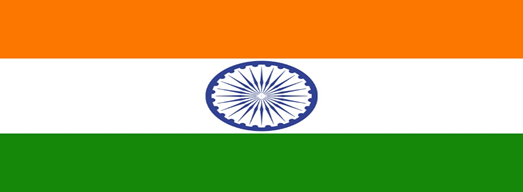

In [ ]:
India = data[data['country']=='India']
India.head()

In [ ]:
plt.figure(figsize=(15,8))
set(font_scale=1.4)
ax = sns.countplot(x = 'year', hue = 'attack', data = India, palette = 'rainbow')
ax.set_title('History of Terrorism in India',{'fontsize':30})
ax.set_xlabel('Year -> ')
ax.set_ylabel('Attack Frequency -> ')
ax.legend(loc=2)

* **Terrorism in India show somewhat same trend as seen globally i.e, bombing/Explosion topped in Attack type followed by Armed Assault in each year**
* **2016 was the worst year for India as the attack frequency was highest**

### Most Active Terrorist group in India

In [ ]:
max_killed = India['kill'].max()
idx = India.loc[India.kill==max_killed].index[0]
idx
print('Maximum people killed in an attack are',max_killed,\
      '\nin the',India.at[idx,'city'],\
     '\nwhich was carried by',India.at[idx,'group'],'using',India.at[idx,'weapon_type'],\
     '\nand maximum people killed were',India.at[idx,'target'],'who were attacked with',India.at[idx,'attack'])

In [ ]:
print("The no. of Terrorist group in India is",len(India['group'].unique()),'!')

In [ ]:
# Finding the top 10 Terrorist group in India
grp_cas = India[India['group'].isin(India['group'].value_counts()[1:11].index)][['group','casualties']]\
.groupby('group').sum().reset_index()
grp_cas

In [ ]:
#Top 10 Terrorist group of India with their count of attacks
grp_cnt=India[India['group'].isin(India['group'].value_counts()[1:11].index)]['group'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'group','group':'count_of_attack'})
grp_cnt

In [ ]:
# Merging the two data frame based on group to get the top 10
grp = grp_cas.merge(grp_cnt, on = 'group').sort_values(by='casualties',ascending=False)
grp

In [ ]:
ax = grp.plot.barh(x='group',y=['casualties','count_of_attack'],stacked=True,figsize=(12,5))
ax.set_title('Top 10 most active Terrorist Group in India',{'fontsize':28})
ax.set_ylabel('Terrorist Group ->')
ax.set_xlabel('Count -> ')


* **CPI-Maoist is the most active group in India**
* **LeT has caused greater no. of casuality in less no. of attacks**
* **Here Unknown refers mostly to the terrorists which cross border from Pakistan to Jammu and Kashmir and enters India but no terrorist group in Pakistan take responsibility of that to avoid suspicion. Next graph will clear it more**

### Most Affected City in India

In [ ]:
city_cnt=India[India['city'].isin(India['city'].value_counts()[1:11].index)]['city'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'city','city':'count'})
ax = city_cnt.plot.bar(x='city', figsize=(18,6))
ax.set_title('Top 10 Most Affected Cities In India',{'fontsize':21})
ax.set_xlabel('State -> ')
ax.set_ylabel('Attack Frequency -> ')

* **Srinagar is the most affected city followed by Sukma district, Bijapur district, Sopore and Latehar district**

### Favourite Target of top 10 Terrorist Group in India

In [ ]:
v1=India[India['group'].isin(India['group'].value_counts()[1:11].index)]
pd.crosstab(v1['target'],v1['group']).plot.bar(stacked=True,figsize=(18,7))
plt.legend(loc=0)
plt.suptitle('Favourite Target of Top 10 Terrorist Groups',fontsize = 30)
plt.xlabel('Terrorist Group -->',{'fontsize':20})
plt.ylabel('Attack Frequency -->',{'fontsize':20})

* **CPI-Maoist mostly target Police, Private Citizen and Property**
* **Private Citizen and Property was mostly damaged by these groups**


In [ ]:
len(India.weapon_type.unique())

In [ ]:
explode=(0.0, 0.05, 0.0, 0.1, 0.15, 0.4, 0.15)
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack=xattack[0:-1]
xattack.rename(columns={'All':'No. of Attack'},inplace=True)
xattack[0:-1].plot.pie(shadow=False,legend=False,y='No. of Attack',startangle=90,fontsize=10,figsize=(18,7),cmap='Set1',autopct='%1.1f%%',
                grid=True,explode=explode)
plt.axis('equal')
plt.legend(loc=0)
plt.suptitle('Weapon Type used by Top 10 Terrorist Group(Pie Chart)',fontsize = 22)
#plt.xlabel('Terrorist Group -->',{'fontsize':20})
#plt.ylabel('Attack Frequency -->',{'fontsize':20})

# 6. Terrorism In Pakistan

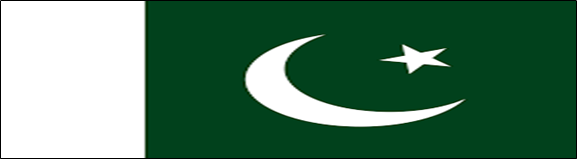

In [ ]:
pak=data[data.country=='Pakistan']

In [ ]:
pak.describe()

* Maximum people ever wounded in an event is 351
* Maximum ransom amount ever asked was 3 Crores!
* An event witnessed 430 casualties!

In [ ]:
plt.figure(figsize=(10,5))
plt.rcParams['axes.labelsize']=20
plt.rcParams['axes.titlesize']=19
plt.rcParams['ytick.labelsize']=15
plt.rcParams['xtick.labelsize']=15
sns.set_style('darkgrid',{'axes.facecolor':'.9'})
plt.figure(figsize=(15,6))
sns.countplot(x=pak.year,hue = 'attack', data = pak, palette = 'rainbow')
plt.title("HISTORY OF TERRORIST ATTACKS")
plt.legend(title='Attack type',loc=2)

* Shows more than two fold rise in attacks in year 2015, with a slight decrease in 2016 
* Terrorism in Pakistan show somewhat same trend as seen globally i.e, bombing/Explosion topped in Attack type followed by Armed Assault in each year

In [ ]:
max_killed = pak['kill'].max()
idx = pak.loc[pak.kill==max_killed].index[0]
print('Maximum people killed in an attack are',max_killed,\
      '\nin the',pak.at[idx,'city'],\
     '\nwhich was carried by',pak.at[idx,'group'],'using',pak.at[idx,'weapon_type'],\
     '\nand maximum people killed were',pak.at[idx,'target'],'who were attacked with',pak.at[idx,'attack'])

In [ ]:
print("The no. of Terrorist groups in Pakistan is",len(pak['group'].unique()))

** Top 10 Terrorist Groups with casualties**

In [ ]:
grp_cas = pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)][['group','casualties']].groupby('group').sum().reset_index()
grp_cas.sort_values(by='casualties',ascending=False)

** Top 10 Terrorist Groups with attack count**

In [ ]:
grp_cnt=pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)]['group'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'group','group':'count_of_attack'})
grp_cnt

In [ ]:
grp = grp_cas.merge(grp_cnt, on = 'group').sort_values(by='casualties',ascending=False)
grp

* Tehrik-i-Taliban Pakistan (TTP) tops the list in terms of casualities 
* Lashkar-e-Jhangvi,United Baloch Army (UBA),Lashkar-e-Islam (Pakistan), Baloch Liberation Army (BLA) and Khorasan Chapter of the Islamic State caused alot of casualities in much less number of attacks

In [ ]:
ax = grp.plot.barh(x='group',y=['count_of_attack','casualties'],stacked=True,figsize=(7,5))
ax.set_title("MOST ACTIVE AND SUCCESSFUL TERRORIST GROUPS")
ax.set_xlabel('count')
plt.legend(title="CASUALTIES AND ATTACKS",loc=0,fontsize='large')

* Tehrik-i-Taliban Pakistan (TTP) and other groups caused great human loss in less attacks. It proves they have been very successful in their attempts.

In [ ]:
pak[pak['city'].isin(pak['city'].value_counts()[0:10].index)]['city'].value_counts().to_frame().plot.bar(figsize=(10,5),width=0.7,legend=False)
plt.xlabel('city')
plt.ylabel('count')
plt.title("MOST TARGETED CITIES")

Karachi is the most targeted city.It might be because it is the most populous city,home to two largest seaports and home to the most busiest airport of the Pakistan,Jinnah International Airport. It is also the premier industrial and financial centre and most cosmopolitan city of the country. It was also the first capital of the country.

In [ ]:
p1=pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)]
pd.crosstab(p1['group'],p1['attack']).plot.barh(stacked=True,figsize=(19,9),width=0.4)
plt.legend(title="ATTACK TYPE",loc=4,fontsize='large')
plt.xlabel('count')
plt.title('TERRORIST GROUPS AND THEIR ATTACK TYPE')

* Bombing/explosion and armed assault has been extensively used by groups
* Even the most successful terrorist group in country Tehrik-i-Taliban Pakistan (TTP) used the same

In [ ]:
p1=p1[p1['target'].isin(p1['target'].value_counts()[0:10].index)]
pd.crosstab(p1['group'],p1['target']).plot.barh(stacked=True,figsize=(13,7),width=0.4)
plt.xlabel('count')
plt.title('TERRORIST GROUPS AND THEIR TARGET TYPE')
plt.legend(title="TARGET TYPE",loc=7,fontsize='large')

* The Unknown groups have targeted almost all types.
* Tehrik-i-Taliban Pakistan (TTP) seem to target the defence force of the country extensively. 
* Military system,private citizens and property are attacked almost by all groups.

In [ ]:
sns.set_style('darkgrid',{'axes.facecolor':'.9'})
pd.crosstab(pak[pak['group'].isin(pak['group'].value_counts()[0:6].index)]['year'],pak[pak['group'].isin(pak['group'].value_counts()[0:6].index)]['group']).plot(color=sns.color_palette('dark',5),figsize=(15,6))
plt.ylabel('count')
plt.title('TERRORIST GROUPS AND THEIR PERIOD OF EXISTENCE')
plt.legend(title="GROUP",loc=0,fontsize='large')

* The TTP has been the most active group since 2012 until 2014 where it showed a slight decrease 
* The Unknown groups show sharp rise in their attacks in 2015.

In [ ]:
plt.figure(figsize=(8,4))
plt.title('CASUALTIES PER YEAR')
p1=pak['year'].value_counts().to_frame().reset_index().rename(columns={'index':'year','year':'casualties'}).sort_values(by='year')
sns.barplot(data=p1,x='year',y='casualties',ci=None)

2015 was the worst year for the country with casualties more than double in past three years

In [ ]:
plt.figure(figsize=(15,5))
plt.title('PROPERTY DAMAGE PER YEAR')
sns.countplot(x='year',hue='property_damg',data=pak,palette='rainbow')
plt.legend(title="PROPERTY DAMAGE",loc=0,fontsize='large')

2015 saw most property damage

In [ ]:
len(pak.weapon_type.unique())

In [ ]:
explode=(0.0, 0.05, 0.08, 0.05, 0.4,0.6)
v1=pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)]
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack
xattack=xattack[0:-1]
xattack.rename(columns={'All':''},inplace=True)
xattack.plot.pie(shadow=False,legend=False,y='',startangle=90,fontsize=16,figsize=(18,9),cmap='Dark2',grid=True,explode=explode)
plt.axis('equal')
plt.legend(title="WEAPONS USED",loc='best',fontsize='large')
plt.suptitle('Weapon Type used by Top 10 Terrorist Group',fontsize = 22)

More than 50% of the attacks used Explosives/Bombs/Dynamites.

In [ ]:
print('Total Number of groups',pak.country.count())
p1=pak[pak.nationality=='Pakistan']
print('Number of groups with nationality as Pakistan:',p1.year.count())
print('% of terrorist groups in Pakistan belonging to Pakistan itself {0:.2f} %:'.format(p1.year.count()/pak.country.count()*100))

#  7. Terrorism In Nepal

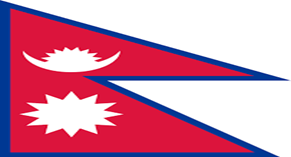

In [ ]:
Nepal=data[data['country']=='Nepal']
Nepal.head(5)

In [ ]:
plt.figure(figsize=(15,5))
set(font_scale=1.4)
ax = sns.countplot(x = 'year', hue = 'attack', data = Nepal, palette = 'rainbow')
ax.set_title('History of Terrorism in Nepal',{'fontsize':30})
ax.set_xlabel('Year -> ')
ax.set_ylabel('Attack Frequency -> ')
ax.legend(loc=9)

* **In 2012 mostly all the attacks were done by bombing or explosive**
* **In 2013 we can see there was the change in thier plan and they attacked in different ways**  
* **In 2014 there is was less attack compare to other years**
* **In 2015 again they started attacking and we can say they attacked with high frequency compare to previous years even they started hostaging people**
* **In 2016 bombing and assassination were more **

# Most Affected City In Nepal

In [ ]:
city_cnt=Nepal[Nepal['city'].isin(Nepal['city'].value_counts()[1:11].index)]['city'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'city','city':'count'})
ax = city_cnt.plot.bar(x='city', figsize=(18,6))
ax.set_title('Top 10 Most Affected Cities In Nepal',{'fontsize':25})
ax.set_xlabel('State -> ')
ax.set_ylabel('Attack Frequency -> ')

* **Biratnagar is the most affected city followed by Siraha district, Rajbiraj, Janajpur and Lalitpur**

### Favourite Target of top 10 Terrorist Group in Nepal

In [ ]:
v1=Nepal[Nepal['group'].isin(Nepal['group'].value_counts()[1:11].index)]
pd.crosstab(v1['group'],v1['target']).plot.bar(stacked=True,figsize=(18,7))
plt.legend(loc=0)
plt.suptitle('Favourite Targets of Top 10 Terrorist Groups',fontsize = 30)
plt.xlabel('Terrorist Group -->',{'fontsize':20})
plt.ylabel('Attack Frequency -->',{'fontsize':20})

* **CPN-Maoist-Chand is the most active group in Nepal
* **CPN-Maoist-Chand mostly targeted telicommunication department and transport system**
* **JTMM has attacked less than some other groups but they attacked in 6 different targets which is highest among top 10 terrorist groups**


In [ ]:
len(Nepal.weapon_type.unique())

In [ ]:
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack=xattack[0:-1]
xattack.rename(columns={'All':'No. of Attack'},inplace=True)
xattack[0:-1].plot.pie(shadow=False,legend=False,y='No. of Attack',startangle=85,fontsize=16,figsize=(15,6),cmap='Set1',autopct='%1.1f%%',
                grid=True)
plt.axis('equal')
plt.legend(loc=0)
plt.suptitle('Weapon Type used by Top 10 Terrorist Group',fontsize = 22)
plt.legend(title="WEAPONS USED",loc=8,fontsize='large',bbox_to_anchor=(0.6, 0., 0.5, 0.7))

# 9. Terrorism In Afghanistan

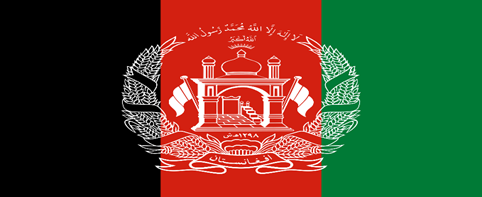

In [ ]:
Afghanistan=data[data['country']=='Afghanistan']
Afghanistan.head(5)

In [ ]:
plt.figure(figsize=(15,8))
set(font_scale=1.4)
ax = sns.countplot(x = 'year', hue = 'attack', data = Afghanistan, palette = 'rainbow')
ax.set_title('History of Terrorism in Afghanistan',{'fontsize':30})
ax.set_xlabel('Year -> ')
ax.set_ylabel('Attack Frequency -> ')
ax.legend(loc=2)

* **Every year mostly Bombing or exploson was used.**
* **In 2015 and 2016 they had used 8 differeny ways of terror.**

# Most Affected City In Afghanistan

In [ ]:
city_cnt=Afghanistan[Afghanistan['city'].isin(Afghanistan['city'].value_counts()[1:11].index)]['city'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'city','city':'count'})
ax = city_cnt.plot.bar(x='city', figsize=(18,6))
ax.set_title('Top 10 Most Affected Cities In Afghanistan',{'fontsize':25})
ax.set_xlabel('State -> ')
ax.set_ylabel('Attack Frequency -> ')

* **Kabul is the most affected city followed by Kandhar, Jalalabad, Ghazni and Lashkar Gah**

### Favourite Target of top 10 Terrorist Group in Afghanistan

In [ ]:
v1=Afghanistan[Afghanistan['group'].isin(Afghanistan['group'].value_counts()[1:11].index)]
pd.crosstab(v1['group'],v1['target']).plot.bar(stacked=True,figsize=(18,8))
plt.legend(loc=0)
plt.suptitle('Favourite Target of Top 10 Terrorist Groups',fontsize = 22)
plt.xlabel('Terrorist Group -->',{'fontsize':20})
plt.ylabel('Attack Frequency -->',{'fontsize':20})

* **Afghanistan inteligence agencies did not get the clue of attacking terrorist group
* **Khorassan Chapter of the Islamic State is the

In [ ]:
len(Afghanistan.weapon_type.unique())

In [ ]:
explode=(0.0, 0.05, 0.0, 0.4, 0.5, 0.8)
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack=xattack[0:-1]
xattack.rename(columns={'All':'No. of Attack'},inplace=True)
xattack[0:-1].plot.pie(shadow=False,legend=False,y='No. of Attack',startangle=85,fontsize=16,figsize=(18,7),cmap='Set1',
                grid=True,explode=explode)
plt.axis('equal')
plt.legend(loc=0)
plt.suptitle('Weapon Type used by Top 10 Terrorist Group(Pie Chart)',fontsize = 22)
plt.legend(title="WEAPONS USED",loc='best',fontsize='large',bbox_to_anchor=(0.6, 0., 0.5, 0.5))

## 10. Terrorism In Iraq

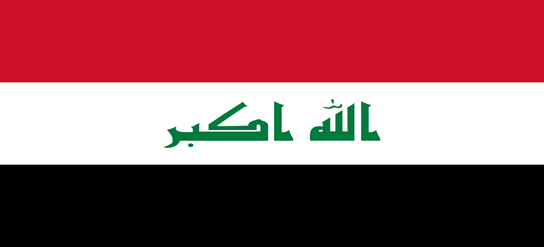

In [ ]:
Iraq = data[data['country']=='Iraq']
Iraq.head()

In [ ]:
plt.figure(figsize=(15,6))
set(font_scale=1.4)
ax = sns.countplot(x = 'year', hue = 'attack', data = Iraq, palette = 'rainbow')
ax.set_title('History of Terrorism in Iraq',{'fontsize':30})
ax.set_xlabel('Year -> ')
ax.set_ylabel('Attack Frequency -> ')
ax.legend(loc=2)

* **Terrorism in Iraq show somewhat same trend as seen globally i.e, bombing/Explosion topped in Attack type.**
* **2016 was the worst year for Iraq as the attack frequency was highest.**
* **There were almost few terrorism activities in Iraq until 2012 and 2013.**
* **We can see almost 3 fold rise in attacks after 2015.**

### Most Active Terrorist group in Iraq

In [ ]:
max_killed = Iraq['kill'].max()
idx = Iraq.loc[Iraq.kill==max_killed].index[0]
idx
print('Maximum people killed in an attack are',max_killed,\
      '\nin the',Iraq.at[idx,'city'],\
     '\nwhich was carried by',Iraq.at[idx,'group'],'using',Iraq.at[idx,'weapon_type'],\
     '\nand maximum people killed were',Iraq.at[idx,'target'],'who were attacked with',Iraq.at[idx,'attack'])

In [ ]:
print("The no. of Terrorist group in Iraq is",len(Iraq['group'].unique()),'!')

In [ ]:
# Finding the top 10 Terrorist groups in Iraq
grp_cas = Iraq[Iraq['group'].isin(Iraq['group'].value_counts()[1:11].index)][['group','casualties']]\
.groupby('group').sum().reset_index()
grp_cas

In [ ]:
#Top 10 Terrorist groups of Iraq with their count of attacks
grp_cnt=Iraq[Iraq['group'].isin(Iraq['group'].value_counts()[1:11].index)]['group'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'group','group':'count_of_attack'})
grp_cnt

In [ ]:
# Merging the two data frame based on group to get the top 10
grp = grp_cas.merge(grp_cnt, on = 'group').sort_values(by='casualties',ascending=False)
grp

In [ ]:
ax = grp.plot.barh(x='group',y=['casualties','count_of_attack'],stacked=True,figsize=(12,6))
ax.set_title('Top 10 most active Terrorist Groups in Iraq',{'fontsize':28})
ax.set_ylabel('Terrorist Group ->')
ax.set_xlabel('Count -> ')

* **ISIL is the most active group in Iraq**
* **AI-Qaida has caused greater no. of casuality in less no. of attacks**

### Most Affected City in Iraq

In [ ]:
city_cnt=Iraq[Iraq['city'].isin(Iraq['city'].value_counts()[1:11].index)]['city'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'city','city':'count'})
ax = city_cnt.plot.bar(x='city', figsize=(18,6))
ax.set_title('Top 10 Most Affected Cities In Iraq',{'fontsize':25})
ax.set_xlabel('State -> ')
ax.set_ylabel('Attack Frequency -> ')

* **Mosul is the most affected city followed by Ramadi, Fallujah and Madain**
* **Mosul witnessed more than twice number of attacks than the rest cities except Ramadi.**

### Favourite Target of top 10 Terrorist Group in Iraq

In [ ]:
v1=Iraq[Iraq['group'].isin(Iraq['group'].value_counts()[1:11].index)]
pd.crosstab(v1['target'],v1['group']).plot.bar(stacked=True,figsize=(18,7))
plt.legend(loc=0)
plt.suptitle('Favourite Target of Top 10 Terrorist Group',fontsize = 30)
plt.xlabel('Terrorist Group -->',{'fontsize':20})
plt.ylabel('Attack Frequency -->',{'fontsize':20})

* **ISIL mostly target Police, Private Citizen and Property,Military and Business**
* **Private Citizen and Property were mostly damaged by these groups**

In [ ]:
len(Iraq.weapon_type.unique())

In [ ]:
explode=(0.0, 0.05, 0.0, 0.3, 0.45, 0.6, 0.0)
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack=xattack[0:-1]
xattack.rename(columns={'All':'No. of Attack'},inplace=True)
xattack[0:-1].plot.pie(shadow=False,legend=False,y='No. of Attack',startangle=135,fontsize=18,figsize=(18,8),cmap='Set1',
                grid=True,explode=explode)
plt.axis('equal')
plt.legend(loc=0)
plt.suptitle('Weapon Type used by Top 10 Terrorist Group(Pie Chart)',fontsize = 22)

* **Explosives were mainly used by majority of the terrorist groups to spread its terror.**

# 11. Terrorism In Syria

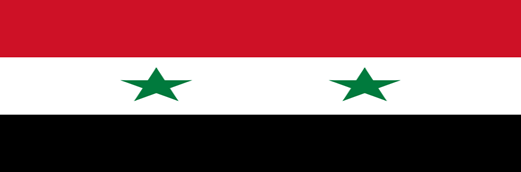

In [ ]:
Syria = data[data['country']=='Syria']
Syria.head()
Syria.count()

In [ ]:
plt.figure(figsize=(15,8))
set(font_scale=1.4)
ax = sns.countplot(x = 'year', hue = 'attack', data = Syria, palette = 'rainbow')
ax.set_title('History of Terrorism in Syria',{'fontsize':30})
ax.set_xlabel('Year -> ')
ax.set_ylabel('Attack Frequency -> ')
ax.legend(loc='upper left',title='Weapon Type')

* **Terrorism in Syria show somewhat same trend as seen globally i.e, bombing/Explosion topped in Attack type followed by Hostage Taking in each year.**
* **2016 was the worst year for Syria as the attack frequency was highest.**
* **2012 and 2013 was almost a peaceful year.**

### Most Active Terrorist group in Syria

In [ ]:
max_killed = Syria['kill'].max()
idx = Syria.loc[Syria.kill==max_killed].index[0]
idx
print('Maximum people killed in an attack are',max_killed,\
      '\nin the',Syria.at[idx,'city'],\
     '\nwhich was carried by',Syria.at[idx,'group'],'using',Syria.at[idx,'weapon_type'],\
     '\nand maximum people killed were',Syria.at[idx,'target'],'who were attacked with',Syria.at[idx,'attack'])

In [ ]:
print("The no. of Terrorist groups in Syria is",len(Syria['group'].unique()),'!')

In [ ]:
# Finding the top 10 Terrorist groups in Syria
grp_cas = Syria[Syria['group'].isin(Syria['group'].value_counts()[1:11].index)][['group','casualties']]\
.groupby('group').sum().reset_index()
grp_cas

In [ ]:
#Top 10 Terrorist groups of Syria with their count of attacks
grp_cnt=Syria[Syria['group'].isin(Syria['group'].value_counts()[1:11].index)]['group'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'group','group':'count_of_attack'})
grp_cnt

In [ ]:
# Merging the two data frame based on group to get the top 10
grp = grp_cas.merge(grp_cnt, on = 'group').sort_values(by='casualties',ascending=False)
grp

In [ ]:
ax = grp.plot.barh(x='group',y=['casualties','count_of_attack'],stacked=True,figsize=(12,7))
ax.set_title('Top 10 most active Terrorist Groups in Syria',{'fontsize':28})
ax.set_ylabel('Terrorist Group ->')
ax.set_xlabel('Count -> ')


* **Al-Nusrah Front is the most active group in Syria**
* **Al-Nusrah Front has caused greater no. of casualities in less no. of attacks**

### Most Affected City in Syria

In [ ]:
city_cnt=Syria[Syria['city'].isin(Syria['city'].value_counts()[1:11].index)]['city'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'city','city':'count'})
ax = city_cnt.plot.bar(x='city', figsize=(18,6))
ax.set_title('Top 10 Most Affected Cities In Syria',{'fontsize':25})
ax.set_xlabel('State -> ')
ax.set_ylabel('Attack Frequency -> ')

* **Damascus is the most affected city followed by Homs, Kobani, Hasakah and Palmyria.**
* **Most of the terrorist attack occured in capital Damascus which means the government is unable** 
  **to provide security to its people.**

### Favourite Target of top 10 Terrorist Group in Syria

In [ ]:
v1=Syria[Syria['group'].isin(Syria['group'].value_counts()[1:11].index)]
pd.crosstab(v1['group'],v1['target']).plot.bar(stacked=True,figsize=(18,8))
plt.legend(loc=0,title='Targets')
plt.suptitle('Favourite Targets of Top 10 Terrorist Group',fontsize = 30)
plt.xlabel('Terrorist Group -->',{'fontsize':20})
plt.ylabel('Attack Frequency -->',{'fontsize':20})

* **Al-Nurah Front mostly target Government(general) and Military.**
* **Government(General) was mostly attacked by these groups.**
* **The country is facing emergency situation.**

In [ ]:
len(Syria.weapon_type.unique())

In [ ]:
explode=(0.01, 0.08, 0.0, 0.4, 0.2)
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack=xattack[0:-1]
xattack.rename(columns={'All':'No. of Attack'},inplace=True)
xattack[0:-1].plot.pie(shadow=False,legend=False,y='No. of Attack',startangle=120,fontsize=15,figsize=(18,10),cmap='Set3',autopct='%1.1f%%',
                grid=True, explode = explode)
plt.axis('equal')
plt.legend(title='Weapon Type',loc=0)
plt.suptitle('Weapon Type used by Top 10 Terrorist Groups',fontsize = 22)

* **The reason for higher no. of casualties in less no. of attack by the terrorist group seems**
  **clear as explosives were used (around 92.1 %). The armed Assault was the second type of weapon**
  **user for terrorising.**

# 12. Terrorism In Nigeria

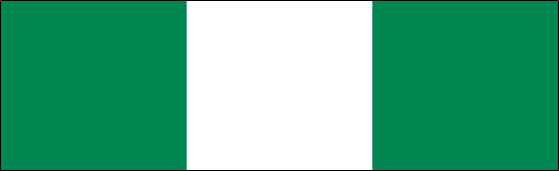

In [ ]:
nig=data[data.country=='Nigeria']
nig.describe()

* An attack holds the casualty record of 392 !
* Mean killings per attack is 8,while mean wounded per attack is 4 

In [ ]:
max_killed = nig['kill'].max()
idx = nig.loc[nig.kill==max_killed].index[0]
print('Maximum people killed in an attack are',max_killed,\
      '\nin the',nig.at[idx,'city'],\
     '\nwhich was carried by',nig.at[idx,'group'],'using',nig.at[idx,'weapon_type'],\
     '\nand maximum people killed were',nig.at[idx,'target'],'who were attacked with',nig.at[idx,'attack'])

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x=nig.year,hue = 'attack', data = nig, palette = 'rainbow')
plt.title("HISTORY OF TERRORIST ATTACKS")
plt.legend(title='Attack type',loc=2)

* After 2014 there has been slight decrease in attacks. 2013 saw comparitively less attacks among others
* 2014 was the worst year for Nigeria as the attack frequency was highest.
* Armed assault extensively used

In [ ]:
nig[nig['city'].isin(nig['city'].value_counts()[0:10].index)]['city'].value_counts().to_frame().plot.bar(figsize=(10,4),width=0.7,legend=False)
plt.xlabel('city')
plt.ylabel('count')
plt.title("MOST TARGETED CITIES")

Maiduguri is the epicentre of most attacks.

In [ ]:
print("The no. of Terrorist groups in Nigeria is",len(nig['group'].unique()))

In [ ]:
nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)][['group','casualties']].groupby('group').sum()\
.merge(nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)]['group'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'group','group':'attack'}), on='group')\
.sort_values(by='attack',ascending=False).plot.barh(x='group',y=['attack','casualties'],figsize=(7,5),stacked=True,width=0.5)
plt.title("MOST ACTIVE AND SUCCESSFUL TERRORIST GROUPS")
plt.xlabel('count')
plt.legend(title="CASUALTIES AND ATTACKS",loc=0,fontsize='large')

* Boko Haram is the most successful terrorist group, followed by Fulani extremists. 
* Boko Haram ,which originates from West Africa, seems to be the most prevalent terrorist group in the country.

In [ ]:
nig=nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)]
pd.crosstab(nig['target'],nig['group']).plot.barh(stacked=True,figsize=(15,7),width=0.7)
plt.xlabel('count')
plt.title('TERRORIST GROUP AND THEIR TARGET TYPE')
plt.legend(title="GROUPS",loc=0,fontsize='small')

Boko Haram and Fulani extremists have majorly attacked private citizens and property. Military,police and utilities are victomized too.

In [ ]:
n1=nig[nig['group'].isin(nig['group'].value_counts()[0:10].index)]
pd.crosstab(n1['attack'],n1['group']).plot.barh(stacked=True,figsize=(12,5),width=0.7)
plt.legend(title="GROUPS",loc=0,fontsize='small')
plt.xlabel('count')
plt.title('TERRORIST GROUP AND THEIR ATTACK TYPE')

Armed assault and bombing/explosion extensively used by Boko Haram.

In [ ]:
len(nig.weapon_type.unique())

More than 50% of the attacks used Firearms.

In [ ]:
plt.figure(figsize=(10,4))
plt.title('CASUALTIES PER YEAR')
v1=nig['year'].value_counts().to_frame().reset_index().rename(columns={'index':'year','year':'casualties'}).sort_values(by='year')
sns.barplot(data=v1,x='year',y='casualties',ci=None)

2015 and 2014 saw almost same number of casualties

In [ ]:
sns.set_style('darkgrid',{'axes.facecolor':'.9'})
pd.crosstab(nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)]['year'],nig[nig['group'].isin(nig['group'].value_counts()[0:6].index)]['group']).plot(color=sns.color_palette('dark',5),figsize=(15,6))
plt.ylabel('count')
plt.title('TERRORIST GROUPS AND THEIR PERIOD OF EXISTENCE')
plt.legend(title="GROUP",loc=7,fontsize='small')

* Boko Haram showed sharp decrease in their attacks in 2013, then a rise next year, then again a slight fall in 2015, then a steep fall in 2016. 
* Fulani extremists suddenly came into existence in 2014, going down, then up, after that.
* Niger Delta Avengers came into limelight in 2016
* Hence there is no consistency in the attack number by all groups 

In [ ]:
plt.figure(figsize=(15,6))
plt.title('PROPERTY DAMAGE PER YEAR')
sns.countplot(x='year',hue='property_damg',data=nig,palette='rainbow')
plt.legend(title="PROPERTY DAMAGE",loc=0,fontsize='large')

* Major property damage occured in 2014 
* No records for most attacks

In [ ]:
print('Total Number of groups',nig.country.count())
n1=nig[nig.nationality=='Nigeria']
print('Number of groups with nationality as Nigeria:',n1.year.count())
print('% of terrorist groups in Nigeria belonging to Nigeria itself {0:.2f} %:'.format(n1.year.count()/nig.country.count()*100))